<a href="https://colab.research.google.com/github/graceyudhaaa/Linear-Regression-from-Scratch/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Projek Analisis Algoritma**
####**Linear Regression pada Data Nilai Ujian Matematika untuk Memprediksi Nilai Akhir**


#**Mounting google drive dengan google colab**
#####**PENTING!**
*Jalankan sel dibawah setiap kali kembali ke notebook ini.*

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
%cd gdrive/MyDrive/Colab/

'/content/gdrive/MyDrive/Colab'

###----------------------- Sukses Mounting dengan Google Drive -----------------------

working directory: /content/gdrive/My Drive/Colab












\

#**Load dataset**

link dataset https://archive.ics.uci.edu/ml/datasets/Student+Performance

##**Informasi tentang dataset**

In [ ]:
%cd Dataset/student/
%ls

/content/gdrive/MyDrive/Colab/Dataset/student
student-mat.csv  student-merge.R  student-por.csv  student.txt


In [ ]:
with open("student.txt", "r") as f:
  dataset_description = f.read()
  print(dataset_description, end="\n\n\n\n")

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or 

##**Dataset**

In [ ]:
%ls

student-mat.csv  student-merge.R  student-por.csv  student.txt


In [ ]:
import pandas as pd
import numpy as np


data = pd.read_csv("student-mat.csv", sep=";")
df = data.copy()
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


\
\
\
\
\
\
.

#**Eksplorasi Dataset**

**Jumlah baris dan kolom yang ada pada dataset**

In [ ]:
print(f"Jumlah baris data: {df.shape[0]}\nJumlah kolom data: {df.shape[1]}", end="\n\n\n\n")

Jumlah baris data: 395
Jumlah kolom data: 33





##**Memvisualisasikan dataset dari nilai tes siswa**


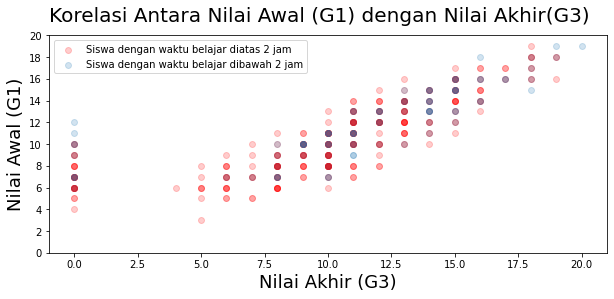

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,4))
plt.suptitle("Korelasi Antara Nilai Awal (G1) dengan Nilai Akhir(G3)", fontsize=20)
plt.xlabel("Nilai Akhir (G3)", fontsize=18)
plt.ylabel("Nilai Awal (G1)", fontsize=18)
scatter1 = plt.scatter(df["G3"].drop(df[(df.studytime > 2)].index), df["G1"].drop(df[((df.studytime > 2))].index), alpha=0.2, color="red")
scatter2 = plt.scatter(df["G3"].drop(df[(df.studytime <= 2)].index), df["G1"].drop(df[((df.studytime <= 2))].index), alpha=0.2)
plt.legend((scatter1, scatter2),("Siswa dengan waktu belajar diatas 2 jam","Siswa dengan waktu belajar dibawah 2 jam"))
plt.yticks([i for i in range(0,21,2)])
plt.show()

Dilihat dari plot diatas, titik-titik tersebut merupakan visualisasi dari nilai siswa dengan koordinat x dari titik adalah nilai G3 dan kordinat y dari adalah nilai G1. Titik-titik yang berada di paling kiri merupakan siswa yang mendapatkan nilai 0 di ujian akhir.

Plot tersebut juga memiliki warna dengan keterangan merah adalah plot siswa yang belajar dibawah 2 jam atau belajar 2 jam, dan plot biru merupakan siswa yang belajar lebih dari 2 jam. Kebanyakan dari siswa belajar selama kurang dari 2 jam

Jika diperhatikan, plot yang berada di bagian kanan terlihat seperti mengikuti sebuah "garis".

\
\
\
\
.

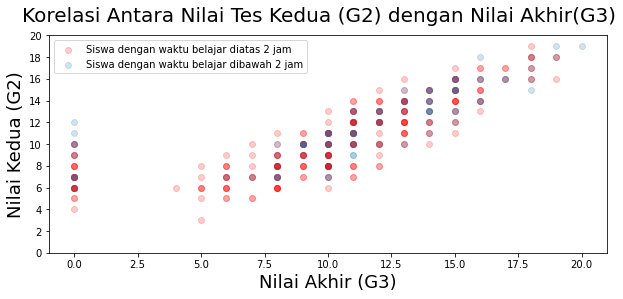

In [ ]:
import matplotlib.pyplot as plt #import pyplot jika tidak menjalankan sel sebelumnya



plt.figure(figsize=(10,4))
plt.suptitle("Korelasi Antara Nilai Tes Kedua (G2) dengan Nilai Akhir(G3)", fontsize=20)
plt.xlabel("Nilai Akhir (G3)", fontsize=18)
plt.ylabel("Nilai Kedua (G2)", fontsize=18)
scatter1 = plt.scatter(df["G3"].drop(df[(df.studytime > 2)].index), df["G1"].drop(df[((df.studytime > 2))].index), alpha=0.2, color="red")
scatter2 = plt.scatter(df["G3"].drop(df[(df.studytime <= 2)].index), df["G1"].drop(df[((df.studytime <= 2))].index), alpha=0.2)
plt.legend((scatter1, scatter2),("Siswa dengan waktu belajar diatas 2 jam","Siswa dengan waktu belajar dibawah 2 jam"))
plt.yticks([i for i in range(0,22,2)])
plt.show()

Plot diatas merupakan scatter plot dengan Nilai akhir (G3) sebagai koordinat X dan Nilai kedua (G2) sebagai koordinat Y. 

Seperti plot sebelumnya, plot diatas juga memiliki warna dengan keterangan yang sama seperti plot sebelumnya. Warna merah adalah plot siswa yang belajar dibawah 2 jam atau belajar 2 jam, dan plot biru merupakan siswa yang belajar lebih dari 2 jam. 

Jika diperhatikan, plot yang berada di bagian kanan terlihat seperti mengikuti sebuah "garis", sama seperti plot sebelumnya. ini menunjukan adanya hubungan linear antara G1,G2 dan G3

\
\
\
\
\
.

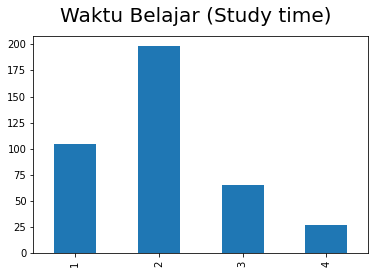

In [ ]:
# df["studytime"].plot(kind="hist", bins=np.arange(6)-0.5, xticks=[i for i in range(1, 5)], xlabel="Waktu Belajar")
df['studytime'].value_counts(sort=False).plot(kind='bar')


plt.gcf().suptitle("Waktu Belajar (Study time)",fontsize=20)
plt.show()

Bar Chart diatas menunjukan jumlah siswa dan waktu belajarnya. mayoritas siswa belajar selama 2 jam.
\
\
\
\.

In [ ]:
print(f"""Rata-rata nilai ujian awal: {df.G1.mean()}
Rata-rata nilai ujian kedua: {df.G2.mean()}
Rata-rata nilai ujian akhir: {df.G3.mean()}
      
Jangkauan rata-rata: {df.G1.mean() - df.G3.mean()}""")

Rata-rata nilai ujian awal: 10.90886075949367
Rata-rata nilai ujian kedua: 10.713924050632912
Rata-rata nilai ujian akhir: 10.415189873417722
      
Jangkauan rata-rata: 0.49367088607594845


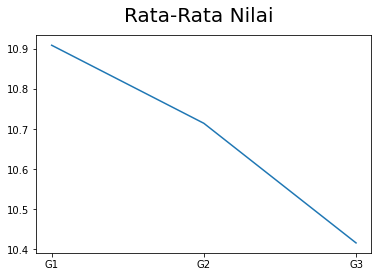

In [ ]:
average_ = [df.G1.mean(),df.G2.mean(),df.G3.mean()]
plt.suptitle("Rata-Rata Nilai", fontsize=20)
plt.plot(['G1', 'G2', 'G3'], average_)
plt.show()

Grafik diatas merupakan rata-rata nilai ujian dari ujian pertama hingga terakhir.
dari grfik diatas terlihat bahwa rata-rata nilai mengalami penurunan, dengan data rata-rata masing masing ujian sebagai berikut:

Rata-rata nilai ujian awal: 10.90886075949367\
Rata-rata nilai ujian kedua: 10.713924050632912\
Rata-rata nilai ujian akhir: 10.415189873417722
      
Jangkauan rata-rata: 0.49367088607594845
\
\
\
\
.

##**Plot Nilai Individual Siswa**

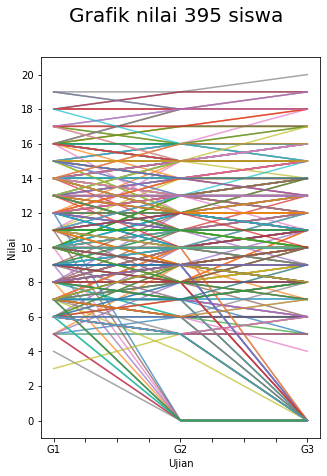

In [ ]:
x = df.loc[:, "G1":"G3"]
n = len(df) #jumlah siswa yang ditampilkan
x_transpose = x.T.loc[:,:n]
x_transpose.plot(kind="line" , figsize=(5,7), yticks=[i for i in range(0,21,2)], legend=False, ylabel="Nilai", xlabel="Ujian", alpha=0.7)

plt.gcf().suptitle(f"Grafik nilai {n} siswa",fontsize=20)
plt.show()


# plt.legend(loc='upper left', bbox_to_anchor=(1, 1.05))

Dari line plot nilai tes siswa secara individual, kita mendapat insight yang menarik. Pada Ujian awal (G1) tidak ada siswa yang mendapat nilai 0. Namun beberapa siswa mendapat nilai 0 di ujian kedua, dan semua siswa yang mendapat nilai 0 di ujian kedua juga mendapat nilai 0 di ujian akhir. Hal ini sangat tidak biasa dan kemungkinan hal ini dikarenakan siswa-siswa tersebut tidak mengikuti ujian kedua dan ujian akhir.
\
\
\
\
\
\.

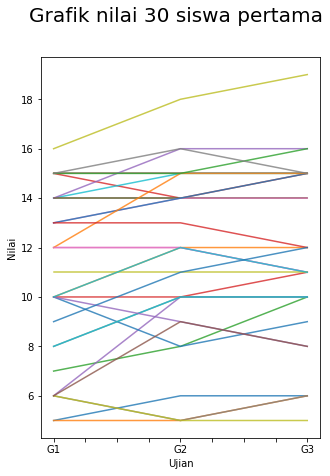

In [ ]:
x = df.loc[:, "G1":"G3"]
n = 30 #jumlah siswa yang ditampilkan
x_transpose = x.T.loc[:,:n]
x_transpose.plot(kind="line" , figsize=(5,7), legend=False, ylabel="Nilai", xlabel="Ujian", alpha=0.8)

plt.gcf().suptitle(f"Grafik nilai {n} siswa pertama",fontsize=20)
plt.show()

# plt.legend(loc='upper left', bbox_to_anchor=(1, 1.05))

Plot diatas merupakan plot nilai 30 siswa pertama.

Jika kasus ekstrim seperti siswa yang mendapatkan nilai 0 diabaikan. maka terlihat bahwa perubahan nilai siswa tidak lah terlalu drastis. Itu artinya, menurut data yang ada, siswa yang mendapatkan nilai rendah akan tetap mendapat nilai yang relatif rendah, dan siswa yang mendapat nilai tinggi akan tetap mendapatkan nilai yang tinggi
\
\
\
\
\.

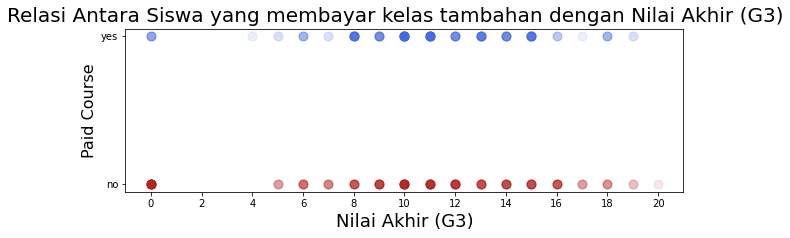

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.suptitle("Relasi Antara Siswa yang membayar kelas tambahan dengan Nilai Akhir (G3)", fontsize=20)
plt.xlabel("Nilai Akhir (G3)", fontsize=18)
plt.ylabel("Paid Course", fontsize=16)
plt.xticks([i for i in range(0,21,2)])
plt.scatter(df["G3"].drop(df[(df.paid == "yes")].index), df["paid"].drop(df[(df.paid == "yes")].index), alpha=0.1, s=80, color="firebrick")
plt.scatter(df["G3"].drop(df[(df.paid == "no")].index), df["paid"].drop(df[(df.paid == "no")].index), alpha=0.1, s=80, color="royalblue")
plt.show()

Plot diatas menunjukan relasi siswa yang membayar extra course dan yang tidak memiliki extra courses.

Distribusi diantara keduanya terlihat merata.
Hal yang menarik dari plot diatas adalah informasi tentang peraih nilai tertinggi di ujian terakhir bukanlah siswa yang membayar extra course.
\
\
\
\.

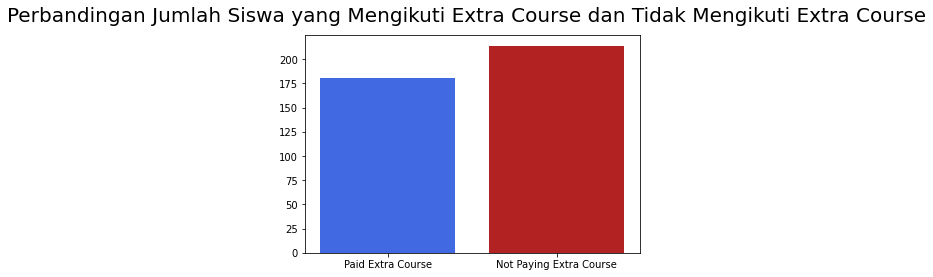

In [ ]:
no_paid_course_student = len(df["paid"].drop(df[(df.paid == "yes")].index))
paid_course_student = len(df["paid"].drop(df[(df.paid == "no")].index))

plt.suptitle("Perbandingan Jumlah Siswa yang Mengikuti Extra Course dan Tidak Mengikuti Extra Course", fontsize=20)
plt.bar(['Paid Extra Course', 'Not Paying Extra Course'],[paid_course_student, no_paid_course_student], color=["royalblue", "firebrick"])
plt.show()

# data['paid'].value_counts().sort_index(ascending=False).plot(kind='bar', color=["royalblue", "firebrick"])
# plt.gcf().suptitle("Histogram Jumlah Siswa dengan Waktu Belajar (Study time)",fontsize=20)

Bar chart diatas menunjukan perbandingan jumlah siswa yang membayar extra course dan tidak membayar extra course. Kebanyakan siswa tidak membayar extra course.
\
\
\
\
.

##**Penarikan Kesimpulan**

Dari visualisasi-visualisasi diatas. kita dapat menarik kesimpulan bahwa nilai G1, G2, G3 berhubungan linear, dan dari plot nilai individual siswa, jika kita membiarkan siswa yang mendapat nilai 0, kita dapat mengetahui bahwa perubahan nilai siswa dari setiap tes tidak terlalu signifikan.

Maka dari itu, algoritma ***Linear Regression*** sangat cocok diaplikasikan ke dataset ini untuk memprediksi nilai akhir siswa.
\
\
\.

##**Memilih Variabel yang Tepat**

Dari beberapa visualisasi diatas, kita dapat memilih variabel yang akan digunakan untuk membuat model linear regression.

G1, G2, G3 karena berhubungan langsung linear.\
Studytime karena terdapat point dimana nilai siswa dapat maksimal (jika siswa belajar selama 2 jam).

Sedangkan untuk paid course tidak berpengaruh karena distribusi nilainya merata dan bahkan peraih nilai tertinggi adalah siswa yang tidak mengambil paid course.

#**Linear Regression**

Dalam statistika, ***Linear Regression*** adalah sebuah pendekatan untuk memodelkan hubungan antara variable terikat Y dan satu atau lebih variable bebas yang disebut X. Salah satu kegunaan dari regresi linear adalah untuk melakukan prediksi berdasarkan data-data yang telah dimiliki sebelumnya. Hubungan di antara variable-variabel tersebut disebut sebagai model regresi linear. Berdasarkan penggunaan variable bebas, maka regresi linear dapat dibagi menjadi dua, yaitu regresi linear univariate dan regresi linear multivariate.

Dalam model dataset ini kita akan menggunakan ***Multivariate Linear Regression***, karena kita akan menggunakan lebih dari satu variabel bebas untuk memcoba membuat model prediksi nilai akhir siswa. Variabel bebas tersebut yaitu G1, G2, dan Studytime


##***Multivariate Linear Regression***

###**Pendahuluan: *Simple Linear Regression***

Dalam Simple Linear Regression, modelnya hanya memiliki satu independent variable dengan bentuk persamaan

$y =   \beta _{0} + \beta _{1}X +  \varepsilon $

dimana \
* $y$ adalah matrix berordo $n \times  1$ berisi nilai asli dari sampel data, dengan $n$ adalah jumlah sampel data

  $ y = \begin{bmatrix} y_{1}  \\ y_{2} \\ . \\ . \\ . \\ y_{n} \end{bmatrix} $
  
  \

* $X$ adalah matrix berordo $n \times  1$ berisi nilai independent variabel/variabel bebas dari sampel data, dengan $n$ adalah jumlah sampel data

  $ X = \begin{bmatrix} X_{1}  \\ X_{2} \\ . \\ . \\ . \\ X_{n} \end{bmatrix} $
  
  \


* $\beta _{1}$ adalah koefisien ketergantungan terhadap independent variabe dari sampel data

* $\beta _{0}$ adalah ***y-intercept*** dari persamaan linear.

* $\varepsilon$ adalah matrix berordo $n \times  1$ berisi error dari model linear regression, dengan $n$ adalah jumlah sampel data

  $ \varepsilon = \begin{bmatrix} \varepsilon_{1}  \\ \varepsilon_{2} \\ . \\ . \\ . \\ \varepsilon_{n} \end{bmatrix} $

\
\
\
Keterangan

$y$ = dependent variabel\
$X$ = independent variabel\
$\beta _{0}$ = y-intercept\
$\beta _{1}$ = weight coefficient (ketergantungan $y$ terhadap $X$)\
$\varepsilon$ = error (deviasi prediksi dari nilai yang asli)



---
####**Estimasi Simple Linear Regression**


\
Namun, untuk menemukan nilai koefisien dengan tepat sangat tidak mungkin. Maka dari itu kita menggunakan Estimasi dari Simple Linear Regression.

$ \widehat{y}  =    \widehat{\beta _{0}} + \widehat{\beta _{1}}X $
--

\
Keterangan

$\widehat{y}$ = estimasi dependent variabel\
$X$ = independent variabel\
$\widehat{\beta _{0}}$ = estimasi y-intercept\
$\widehat{\beta _{1}}$ = estimasi weight coefficient (ketergantungan y terhadap x)

Perhatikan bahwa error ($\varepsilon$) tidak termasuk bagian dari persamaan diatas, karena persamaan tersebut merupakan estimasi.
\
\
\
. 

###***Multivariate Linear Regression***

Persamaan untuk *Multivariate Linear Regression* hampir sama dengan *Simple Linear Regression* hanya saja dengan variabel bebas dan koefisien yang lebih banyak.

\
$y =   \beta _{0} + \beta _{1}X_{1} + \beta _{2}X_{2} + \beta _{3}X_{3} + ...+\varepsilon $


\
\
persamaan diatas juga dapat diubah menjadi bentuk matrix
\
\
$y =   X\beta + \varepsilon $


dimana \
* $y$ adalah matrix berordo $n \times  1$ berisi nilai asli dari sampel data, dengan $n$ adalah jumlah sampel data

  $ y = \begin{bmatrix} y_{1}  \\ y_{2} \\ . \\ . \\ . \\ y_{n} \end{bmatrix} $
  
  \

* $X$ adalah matrix berordo $n \times  (p+1)$ berisi nilai independent variabel/variabel bebas dari sampel data, dengan $n$ adalah jumlah sampel data dan $p$ adalah jumlah variabel bebas. ordo $(p + 1)$ dikarenakan ordo matrix $X$ harus menyesuaikan ordo $\beta$ yang berordo $(p+1) \times 1$ karena matrix $\beta$ mencakup $\beta _{0}$
\
\
  $ X =  \begin{bmatrix}
1 &  x_{1,1} &  x_{1,2} &  . & . &  x_{1,p} \\
1 &  x_{2,1} &  x_{2,2} &  . & . &  . \\ 
1 &  x_{3,1} &  x_{3,2} &  . & . &  . \\
1 &  . &  . &  . & . &  . \\
1 &  . &  . &  . & . &  . \\
1 &  x_{n,1} &  x_{n,2} &  . & . &  x_{n,p}
\end{bmatrix}  $
  
  \

* $\beta$ adalah matrix koefisien ketergantungan terhadap independent variabel dari sampel data, dengan $\beta _{0}$ adalah y-intercept. Matrix $\beta$ berordo $(p+1) \times 1$

  $ \beta = \begin{bmatrix} \beta_{0}  \\ \beta_{1} \\ \beta_{2} \\ . \\ . \\ . \\ \beta_{n} \end{bmatrix} $
  
  \

*  $\varepsilon$ adalah matrix berordo $n \times  1$ berisi error dari model linear regression, dengan $n$ adalah jumlah sampel data

  $ \varepsilon = \begin{bmatrix} \varepsilon_{1}  \\ \varepsilon_{2} \\ . \\ . \\ . \\ \varepsilon_{n} \end{bmatrix} $
  
  
Jadi persamaan diatas jika ditulis ulang dalam bentuk matrix akan menjadi seperti berikut 


$ \begin{bmatrix} y_{1}  \\ y_{2} \\ . \\ . \\ . \\ y_{n} \end{bmatrix} = \begin{bmatrix}
1 &  x_{1,1} &  x_{1,2} &  . & . &  x_{1,p} \\
1 &  x_{2,1} &  x_{2,2} &  . & . &  . \\ 
1 &  x_{3,1} &  x_{3,2} &  . & . &  . \\
1 &  . &  . &  . & . &  . \\
1 &  . &  . &  . & . &  . \\
1 &  x_{n,1} &  x_{n,2} &  . & . &  x_{n,p}
\end{bmatrix} \begin{bmatrix} \beta_{0}  \\ \beta_{1} \\ \beta_{2} \\ . \\ . \\ . \\ \beta_{n} \end{bmatrix} + \begin{bmatrix} \varepsilon_{1}  \\ \varepsilon_{2} \\ . \\ . \\ . \\ \varepsilon_{n} \end{bmatrix}$

Persamaan diatas juga lebih mudah diproses oleh komputer, karena komputer memproses data yang banyak dengan lebih efisien jika dalam bentuk matrix

---
\
####**Estimasi Multivariate Linear Regression**

\
Untuk menghitung estimasi dari y kita menggunakan persamaan berikut

$\widehat{y}  =   X\widehat{\beta}$
--

dengan keterangan

* $\widehat{y}$ adalah matrix berordo $n \times  1$ berisi nilai asli dari sampel data, dengan $n$ adalah jumlah sampel data

  $ \widehat{y} = \begin{bmatrix} \widehat{y}_{1}  \\ \widehat{y}_{2} \\ . \\ . \\ . \\ \widehat{y}_{n} \end{bmatrix} $
  
  \

* $X$ adalah matrix berordo $n \times  (p+1)$ berisi nilai independent variabel/variabel bebas dari sampel data, dengan $n$ adalah jumlah sampel data dan $p$ adalah jumlah variabel bebas. ordo $(p + 1)$ dikarenakan ordo matrix $X$ harus menyesuaikan ordo $\widehat{\beta}$ yang berordo $(p+1) \times 1$ karena matrix $\widehat{\beta}$ mencakup $\widehat{\beta} _{0}$
\
\
  $ X =  \begin{bmatrix}
1 &  x_{1,1} &  x_{1,2} &  . & . &  x_{1,p} \\
1 &  x_{2,1} &  x_{2,2} &  . & . &  . \\ 
1 &  x_{3,1} &  x_{3,2} &  . & . &  . \\
1 &  . &  . &  . & . &  . \\
1 &  . &  . &  . & . &  . \\
1 &  x_{n,1} &  x_{n,2} &  . & . &  x_{n,p}
\end{bmatrix}  $
  
  \

* $\widehat{\beta}$ adalah matrix koefisien ketergantungan terhadap independent variabel dari sampel data, dengan $\widehat{\beta} _{0}$ adalah y-intercept. Matrix $\widehat{\beta}$ berordo $(p+1) \times 1$

  $ \widehat{\beta} = \begin{bmatrix} \widehat{\beta}_{0}  \\ \widehat{\beta}_{1} \\ \widehat{\beta}_{2} \\ . \\ . \\ . \\ \widehat{\beta}_{n} \end{bmatrix} $
  
  \


###**Menghitung Koefisien**

Rumus untuk menghitung estimasi koefisien ketergantungan adalah sebagai berikut

$ \widehat{ \beta } =  ( X^{T} X)^{-1}  X^{T}y$


Rumus tersebut diturunkan menggunakan metode *least squares* yaitu dengan cara meminimalkan nilai **Residual Sum of Square (RSS)**
\
\
$min  \sum_i^n ( y_{i}  -  \widehat{y_{i}} ) ^{2} $
\
\
Penurunan rumus $ \widehat{ \beta }$ sangatlah rumit dan memerlukan aplikasi kalkulus pada matrix. Untuk penjelasan penurunan dari rumus tersebut video berikut mempunyai penjelasan yang cukup mudah dipahami.

[link video](https://youtu.be/K_EH2abOp00?t=466)


###**Kompleksitas Waktu**

Jika diperhatikan dari rumus-rumus untuk linear regression. Kebanyakan merupakan operasi matrix

* $\widehat{y}  =   X\widehat{\beta}$


* $ \widehat{ \beta } =  ( X^{T} X)^{-1}  X^{T}y$

Mari kita perhatikan. fungsi yang beroperasi pada matrix memerlukan dua variabel, yaitu jumlah baris dan jumlah kolom. pada hal ini kita menyebut p sebagai kolom (yaitu banyaknya variabel bebas), dan n sebagai baris (banyaknya sampel)

untuk pedoman awal dari bermacam-macam kompleksitas waktu dari operasi matrix dasar, kita dapat melihat tabel dari [wikipedia](https://en.wikipedia.org/wiki/Computational_complexity_of_mathematical_operations#Matrix_algebra).

\

Beberapa yang perlu diingat
*   Mengalikan 2 matrix dengan ordo $m \times n$ dan $m \times p$ menghasilkan matrix dengan ordo $m \times p$ dan membutuhkan kompleksitas waktu $O(mnp)$
*   Mengalikan 2 matrix dengan ordo $n \times n$ menghasilkan matrix dengan ordo $n \times n$ dan membutuhkan kompleksitas waktu $O(n^{3})$
*   Melakukan operasi inverse pada sebuah matrix berordo $n \times n$ membutuhkan kompleksitas waktu $O(n^{3})$

\
\
**Analisa Algoritma Estimasi$**

\

$ \widehat{ \beta } =  ( X^{T} X)^{-1}  X^{T}y$

\

1.   $X^{T} X$ adalah perkalian 2 matrix dengan ordo $(p + 1) \times n$ dan $n \times (p + 1)$, **menghasilkan matrix dengan ordo $(p + 1) \times (p + 1)$** dan membutuhkan waktu 
$O((p + 1) n (p + 1)) = O((p + 1) ^{2} n)  = O(p^{2}n)$ 


2.   $( X^{T} X)^{-1}$ **menghasilkan inverse matrix dengan ordo $(p + 1) \times (p + 1)$** dan membutuhkan waktu $O((p + 1) ^{3})  = O(p^{3})$


3. $X^{T} y$ adalah perkalian 2 matrix dengan ordo $(p + 1) \times n$ dan $n \times 1$, **menghasilkan matrix dengan ordo $(p + 1) \times 1$** dan membutuhkan waktu 
$O((p + 1) n \times 1) = O(pn + n)  = O(pn)$


4. $( X^{T} X)^{-1}  X^{T}y$ adalah perkalian 2 matrix dengan ordo $(p + 1) \times (p + 1)$ dan $(p + 1) \times 1$, **menghasilkan matrix dengan ordo $(p + 1) \times 1$** dan membutuhkan waktu 
$O((p + 1) ^{2} \times 1) = O(p^{2})$


5. Dan untuk melengkapi, $\widehat{y} = X\widehat{\beta}$ adalah perkalian 2 matrix dengan ordo  $n \times (p + 1)$ dan $(p + 1) \times 1$, **menghasilkan matrix dengan ordo $n \times 1$** dan membutuhkan waktu 
$O((p + 1) n \times 1) = O(pn + n)  = O(pn)$

\

Maka total Big-O dari algoritma linear regression adalah
\
\
$O(p^{2}n + p^{3} + pn + p^{2} + pn)$

Kita ketahui bahwa:
* $p^{3} > p^{2}$
* $p^{2}n > pn$

Maka, Kompleksitas waktu dari algoritma linear regression adalah $O(p^{2}n + p^{3})$ dengan keterangan:

* n : Jumlah sample data (baris)
* p : Jumlah variabel bebas (kolom)

#**Implementasi**

In [ ]:
import numpy as np                                      #--> numpy untuk pengelolaan matematika


def random_sampling(*dataframe, test_size = 0.25):      #--> fungsi untuk mengampil random sampel
  idx = dataframe[0].sample(frac=1).index
  
  training_size = 1 - test_size

  returnval = []
  for i in dataframe:
    i = i.reindex(idx)

    training = i[:int(len(i) * training_size)]
    returnval.append(training)
    test = i[int(len(i) * training_size):]
    returnval.append(test)

  return tuple(returnval) #return format: Training, Test...


#ML Linear Regression model
class MLinear_Regression:
  def __init__(self):
    pass

  def train(self, X, y):
    self.X = X.iloc[:]
    self.X.insert(loc=0, column='intercept', value=1)
    self.y = y.iloc[:]

    X_transpose = self.X.T
    first =np.linalg.inv(X_transpose.dot(self.X))
    second = X_transpose.dot(self.y)
    self.beta = first.dot(second)
    self.y_hat = self.X.dot(self.beta)
    self.intercept_ = self.beta[0]
    self.coef_ = self.beta[1:]

    self.RSS = 0                              #Mencari Residual sum of squares
    for y_value, y_hat in zip(self.y, self.y_hat):
      residual = y_value - y_hat
      self.RSS += residual**2

    self.TSS = 0                              #Mencari Total sum of squares
    for y_value in self.y:
      delta = y_value - self.y.mean()
      self.TSS += delta**2

    self.score = 1 - (self.RSS/self.TSS)      #Mencari R^2 (coefficient of determination)  atau akurasi model

    return self

  def predict(self, dependent):               
    test_array = np.array(dependent)
    if test_array.ndim == 1:
      prediction = self.intercept_
      for index, var in enumerate(test_array):
        prediction += var * self.coef_[index]
      
      return prediction
    else:
      predictions = []
      for var in test_array:
        prediction = self.predict(var)
        predictions.append(prediction)

      return predictions

    def __str__(self):
      return f"Linear Regression Model:\nCoefficient of Determination: {self.score:'.2d'}\nY-intercept: {self.intercept_}\nKoefisien: "

In [ ]:
# Memilih variabel yang relevan
df2 = df.copy(deep=True)
df2 = df2[["studytime", "G1", "G2" , "G3"]]
df2

,studytime,G1,G2,G3
0,2,5,6,6
1,2,5,5,6
2,2,7,8,10
3,3,15,14,15
4,2,6,10,10
...,...,...,...,...
390,2,9,9,9
391,1,14,16,16
392,1,10,8,7
393,1,11,12,10


In [ ]:
# Menyiapkan data
y = df2["G3"]
X = df2.drop(["G3"], 1)

In [ ]:
import time

# Melatih model
X_train, x_test, Y_train, y_test = random_sampling(X, y, test_size=0.1)

my_model = MLinear_Regression()

training_time = time.time()
my_model.train(X_train,  Y_train)
training_time = time.time() - training_time

print("Training Model Selesai")
print(f"Jumlah data: {X_train.shape[0]}")
print(f"Jumlah kolom: {X_train.shape[1]}")
print(f"Waktu training: {training_time:.2g} detik")
print(f"Tingkat akurasi model: {(my_model.score * 100):.2g}%")
print(f"Y-intercept: {my_model.intercept_}")
print(f"Koefisien: {my_model.coef_}")


Training Model Selesai
Jumlah data: 355
Jumlah kolom: 3
Waktu training: 0.039 detik
Tingkat akurasi model: 84%
Y-intercept: -1.5736019339732508
Koefisien: [-0.17800009  0.17468139  0.97515231]


In [ ]:
#testing model menggunakan test dataset
from prettytable import PrettyTable
predict = my_model.predict(x_test)


t = PrettyTable(['Nilai asli', 'Nilai prediksi'])
for nilai_asli, nilai_prediksi in zip(y_test.iloc[:], predict):
  t.add_row([nilai_asli, int(round(nilai_prediksi))])

print(t)

+------------+----------------+
| Nilai asli | Nilai prediksi |
+------------+----------------+
|     11     |       11       |
|     10     |       9        |
|     13     |       12       |
|     9      |       8        |
|     17     |       15       |
|     12     |       13       |
|     11     |       9        |
|     10     |       9        |
|     11     |       10       |
|     15     |       15       |
|     10     |       9        |
|     6      |       5        |
|     11     |       12       |
|     0      |       8        |
|     11     |       10       |
|     7      |       7        |
|     10     |       11       |
|     14     |       14       |
|     16     |       15       |
|     12     |       12       |
|     8      |       6        |
|     18     |       18       |
|     9      |       9        |
|     13     |       13       |
|     11     |       12       |
|     0      |       4        |
|     6      |       4        |
|     14     |       14       |
|     10

In [ ]:
# Memprediksi dari input

jumlah = int(input("Masukan jumlah siswa yang akan diprediksi: "))

if jumlah > 1:
  pred = []

for i in range(jumlah):
  studytime = int(input(f"Masukan lama waktu belajar anak ke-{i + 1}: "))
  G1 = int(input(f"Masukan nilai ujian pertama anak ke-{i + 1}: "))
  G2 = int(input(f"Masukan nilai ujian kedua anak ke-{i + 1}: "))
  print('\n')

  ind_var = [studytime, G1, G2]
  if jumlah > 1:
    pred.append(ind_var)

if jumlah > 1:
  user_pred = my_model.predict(pred)
else:
  user_pred = my_model.predict(ind_var)

if jumlah > 1:
    for i, nilai in enumerate(user_pred):
      print(f"Prediksi Nilai Akhir anak ke-{i+1} : {nilai}")
else:
  print(f"Prediksi Nilai Akhir: {user_pred}")

Masukan jumlah siswa yang akan diprediksi: 3
Masukan lama waktu belajar anak ke-1: 2
Masukan nilai ujian pertama anak ke-1: 7
Masukan nilai ujian kedua anak ke-1: 18


Masukan lama waktu belajar anak ke-2: 1
Masukan nilai ujian pertama anak ke-2: 7
Masukan nilai ujian kedua anak ke-2: 9


Masukan lama waktu belajar anak ke-3: 4
Masukan nilai ujian pertama anak ke-3: 11
Masukan nilai ujian kedua anak ke-3: 19


Prediksi Nilai Akhir anak ke-1 : 17.006815463478425
Prediksi Nilai Akhir anak ke-2 : 8.270803622219582
Prediksi Nilai Akhir anak ke-3 : 18.252006732357017


##**Optimalisasi Algoritma**

Algoritma diatas mempunyai kompleksitas waktu $O(p^{2}n + p^{3})$ dimana $p^{3}$ berasal dari mencari inverse dari matrix $X^{T}X$.

Namun dari pertemuan sebelumnya kita mengetahui bahwa ada algoritma inverse matrix 
yang hanya membutuhkan waktu $O(n^{2})$, yaitu dengan menghitung determinan terlebih dahulu.
Jika kita menggunakan cara diatas maka kompleksitas waktu keseluruhan akan menjadi 
$O(p^{2}n + p^{2})$.

In [ ]:
import numpy as np
from sympy import Matrix #--> library untuk mencari determinant

#ML Linear Regression model menggunakan inverse determinan
class MLinear_Regression_opt:
  def __init__(self):
    pass

  def train(self, X, y):
    self.X = X.iloc[:]
    self.X.insert(loc=0, column='intercept', value=1)
    self.y = y.iloc[:]

    X_transpose = np.array(self.X.T)
    XtX = Matrix(X_transpose.dot(self.X))
    first = np.array((1/XtX.det())*(XtX.adjugate())).astype(np.float64)
    second = X_transpose.dot(self.y)
    self.beta = first.dot(second)
    self.y_hat = self.X.dot(self.beta)
    self.intercept_ = self.beta[0]
    self.coef_ = self.beta[1:]

    self.RSS = 0                              #Mencari Residual sum of squares
    for y_value, y_hat in zip(self.y, self.y_hat):
      residual = y_value - y_hat
      self.RSS += residual**2

    self.TSS = 0                              #Mencari Total sum of squares
    for y_value in self.y:
      delta = y_value - self.y.mean()
      self.TSS += delta**2

    self.score = 1 - (self.RSS/self.TSS)      #Mencari R^2 (coefficient of determination)  atau akurasi model

    return self

  def predict(self, dependent):               
    test_array = np.array(dependent)
    if test_array.ndim == 1:
      prediction = self.intercept_
      for index, var in enumerate(test_array):
        prediction += var * self.coef_[index]
      
      return prediction
    else:
      predictions = []
      for var in test_array:
        prediction = self.predict(var)
        predictions.append(prediction)

      return predictions

In [ ]:
import time

# Melatih model
X_train, x_test, Y_train, y_test = random_sampling(X, y, test_size=0.1)

my_model_opt = MLinear_Regression_opt()

training_time = time.time()
my_model_opt.train(X_train,  Y_train)
training_time = time.time() - training_time

print("Training Model Selesai")
print(f"Jumlah data: {X_train.shape[0]}")
print(f"Jumlah kolom: {X_train.shape[1]}")
print(f"Waktu training: {training_time:.2g} detik")
print(f"Tingkat akurasi model: {(my_model_opt.score * 100):.2g}%")
print(f"Y-intercept: {my_model_opt.intercept_}")
print(f"Koefisien: {my_model_opt.coef_}")

Training Model Selesai
Jumlah data: 355
Jumlah kolom: 3
Waktu training: 0.03 detik
Tingkat akurasi model: 83%
Y-intercept: -1.6341041584716933
Koefisien: [-0.23588723  0.1853843   0.98115911]


In [ ]:
# #perbandingan waktu training
X_train, x_test, Y_train, y_test = random_sampling(X, y, test_size=0.1)

original_model = MLinear_Regression()
optimal_model = MLinear_Regression_opt()

training_time = time.time()
original_model.train(X_train,  Y_train)
training_time = time.time() - training_time

print("Training Model Selesai")
print(f"Jumlah data: {X_train.shape[0]}")
print(f"Jumlah kolom: {X_train.shape[1]}")
print(f"Waktu training untuk model tidak teroptimisasi: {training_time:.2g} detik")
print(f"Tingkat akurasi model: {(original_model.score * 100):.2f}%")
print(f"Y-intercept: {original_model.intercept_}")
print(f"Koefisien: {original_model.coef_}")

Training Model Selesai
Jumlah data: 355
Jumlah kolom: 3
Waktu training untuk model tidak teroptimisasi: 0.032 detik
Tingkat akurasi model: 82.27%
Y-intercept: -1.4183423590365578
Koefisien: [-0.20467608  0.1410332   1.00182818]


In [ ]:
training_time_opt = time.time()
optimal_model.train(X_train,  Y_train)
training_time_opt = time.time() - training_time_opt


print("Training Model Selesai")
print(f"Jumlah data: {X_train.shape[0]}")
print(f"Jumlah kolom: {X_train.shape[1]}")
print(f"Waktu training untuk model teroptimisasi: {training_time_opt:.2g} detik")
print(f"Tingkat akurasi model: {(optimal_model.score * 100):.2f}%")
print(f"Y-intercept: {optimal_model.intercept_}")
print(f"Koefisien: {optimal_model.coef_}")

Training Model Selesai
Jumlah data: 355
Jumlah kolom: 3
Waktu training untuk model teroptimisasi: 0.025 detik
Tingkat akurasi model: 82.27%
Y-intercept: -1.418342359036373
Koefisien: [-0.20467608  0.1410332   1.00182818]


In [ ]:
from sklearn.linear_model import LinearRegression

skl_model = LinearRegression()

training_time_sk = time.time()
skl_model.fit(X_train,  Y_train)
training_time_sk = time.time() - training_time_sk

print("Training Model Selesai")
print(f"Jumlah data: {X_train.shape[0]}")
print(f"Jumlah kolom: {X_train.shape[1]}")
print(f"Waktu training untuk model SciKitlearn: {training_time_sk:.2g} detik")
print(f"Tingkat akurasi model: {(skl_model.score(X_train, Y_train) * 100):.2f}%")
print(f"Y-intercept: {skl_model.intercept_}")
print(f"Koefisien: {skl_model.coef_}")

Training Model Selesai
Jumlah data: 355
Jumlah kolom: 3
Waktu training untuk model SciKitlearn: 0.0021 detik
Tingkat akurasi model: 82.27%
Y-intercept: -1.4183423590363624
Koefisien: [-0.20467608  0.1410332   1.00182818]
